# Open NoteBook [Jupyter](https://jupyter.readthedocs.io/pt_BR/latest/index.html)

>cmmdline used to edit my NoteBook:

`jupyter notebook Workflow_UCE_Turdus_SouthAmerica.ipynb`

---

## <font color='darkgreen'>Processing UCEs Data Sets: Turdus South America</font> 

---

### Workflow based on code available at [Tutorial II: Phasing UCE data](https://phyluce.readthedocs.io/en/latest/tutorial-two.html)

This workflow was adapted to genomic Projects running at BioGeoAM Lab (Biogeografia e conservação da avifauna especializada nos diferentes ambientes Amazônicos, led by [Dr. Camila Cherem Ribas](https://scholar.google.com.br/citations?user=-X2HGoYAAAAJ&hl=pt-BR&oi=sra)), at [Instituto Nacional de Pesquisas da Amazônia](https://antigo.inpa.gov.br/). 
It has some modifications made by [Nelson Buainain](https://scholar.google.com/citations?user=Pm38NmgAAAAJ&hl=pt-BR) and [Mateus Ferreira](https://scholar.google.com/citations?hl=pt-BR&user=whai46MAAAAJ&view_op=list_works&sortby=pubdate). It was firstly written in Portuguese by Buainain. This workflow has a few notes added by me ([Romina Batista](https://scholar.google.com.br/citations?hl=pt-BR&user=jNo6XYQAAAAJ)) while I was running this pipeline to prepare the manuscript related to the *Evolutionary history of Thrushes distributed in South America*. I prepared the documentation of this genomic project using Jupyter NoteBook. 

Markdown: [Syntax](https://daringfireball.net/projects/markdown/syntax#em) used in this documentation.

I was also quite often using this [repository](https://jasonleebrown.github.io/UCE_phyluce_pipeline/), from [Brown Lab](https://www.jasonleebrown.org/), as a supporting material.

The main purpose of this adapted pipeline is 1. to produce a reference file to use while phase our UCEs dataset, and at the end extract SNPs from this phased UCEs, and 2. to document all steps, challenges, errors while processing UCEs. 

**<font color='gray'>Important Notes:</font> ** 

* Data set 

   The dataset used in this NoteBook was produced during my PhD. (2014-2018) by [Rapid    Genomics](http://rapid-genomics.com/home/) and [SciLifeLab](https://www.scilifelab.se/)
    

* Samples 

    A total of 142 samples were processed, covering ca.99% of the diversity currently recognized for Thrushes distributed in South America. Out of which 33 samples were published in our [Global Phylogenomic Project](https://github.com/RominaSSBatista/Turdus-Project) and the remaining 109 were generated for this study. 

---
    
    
### Map of samples used in this continental study:

---

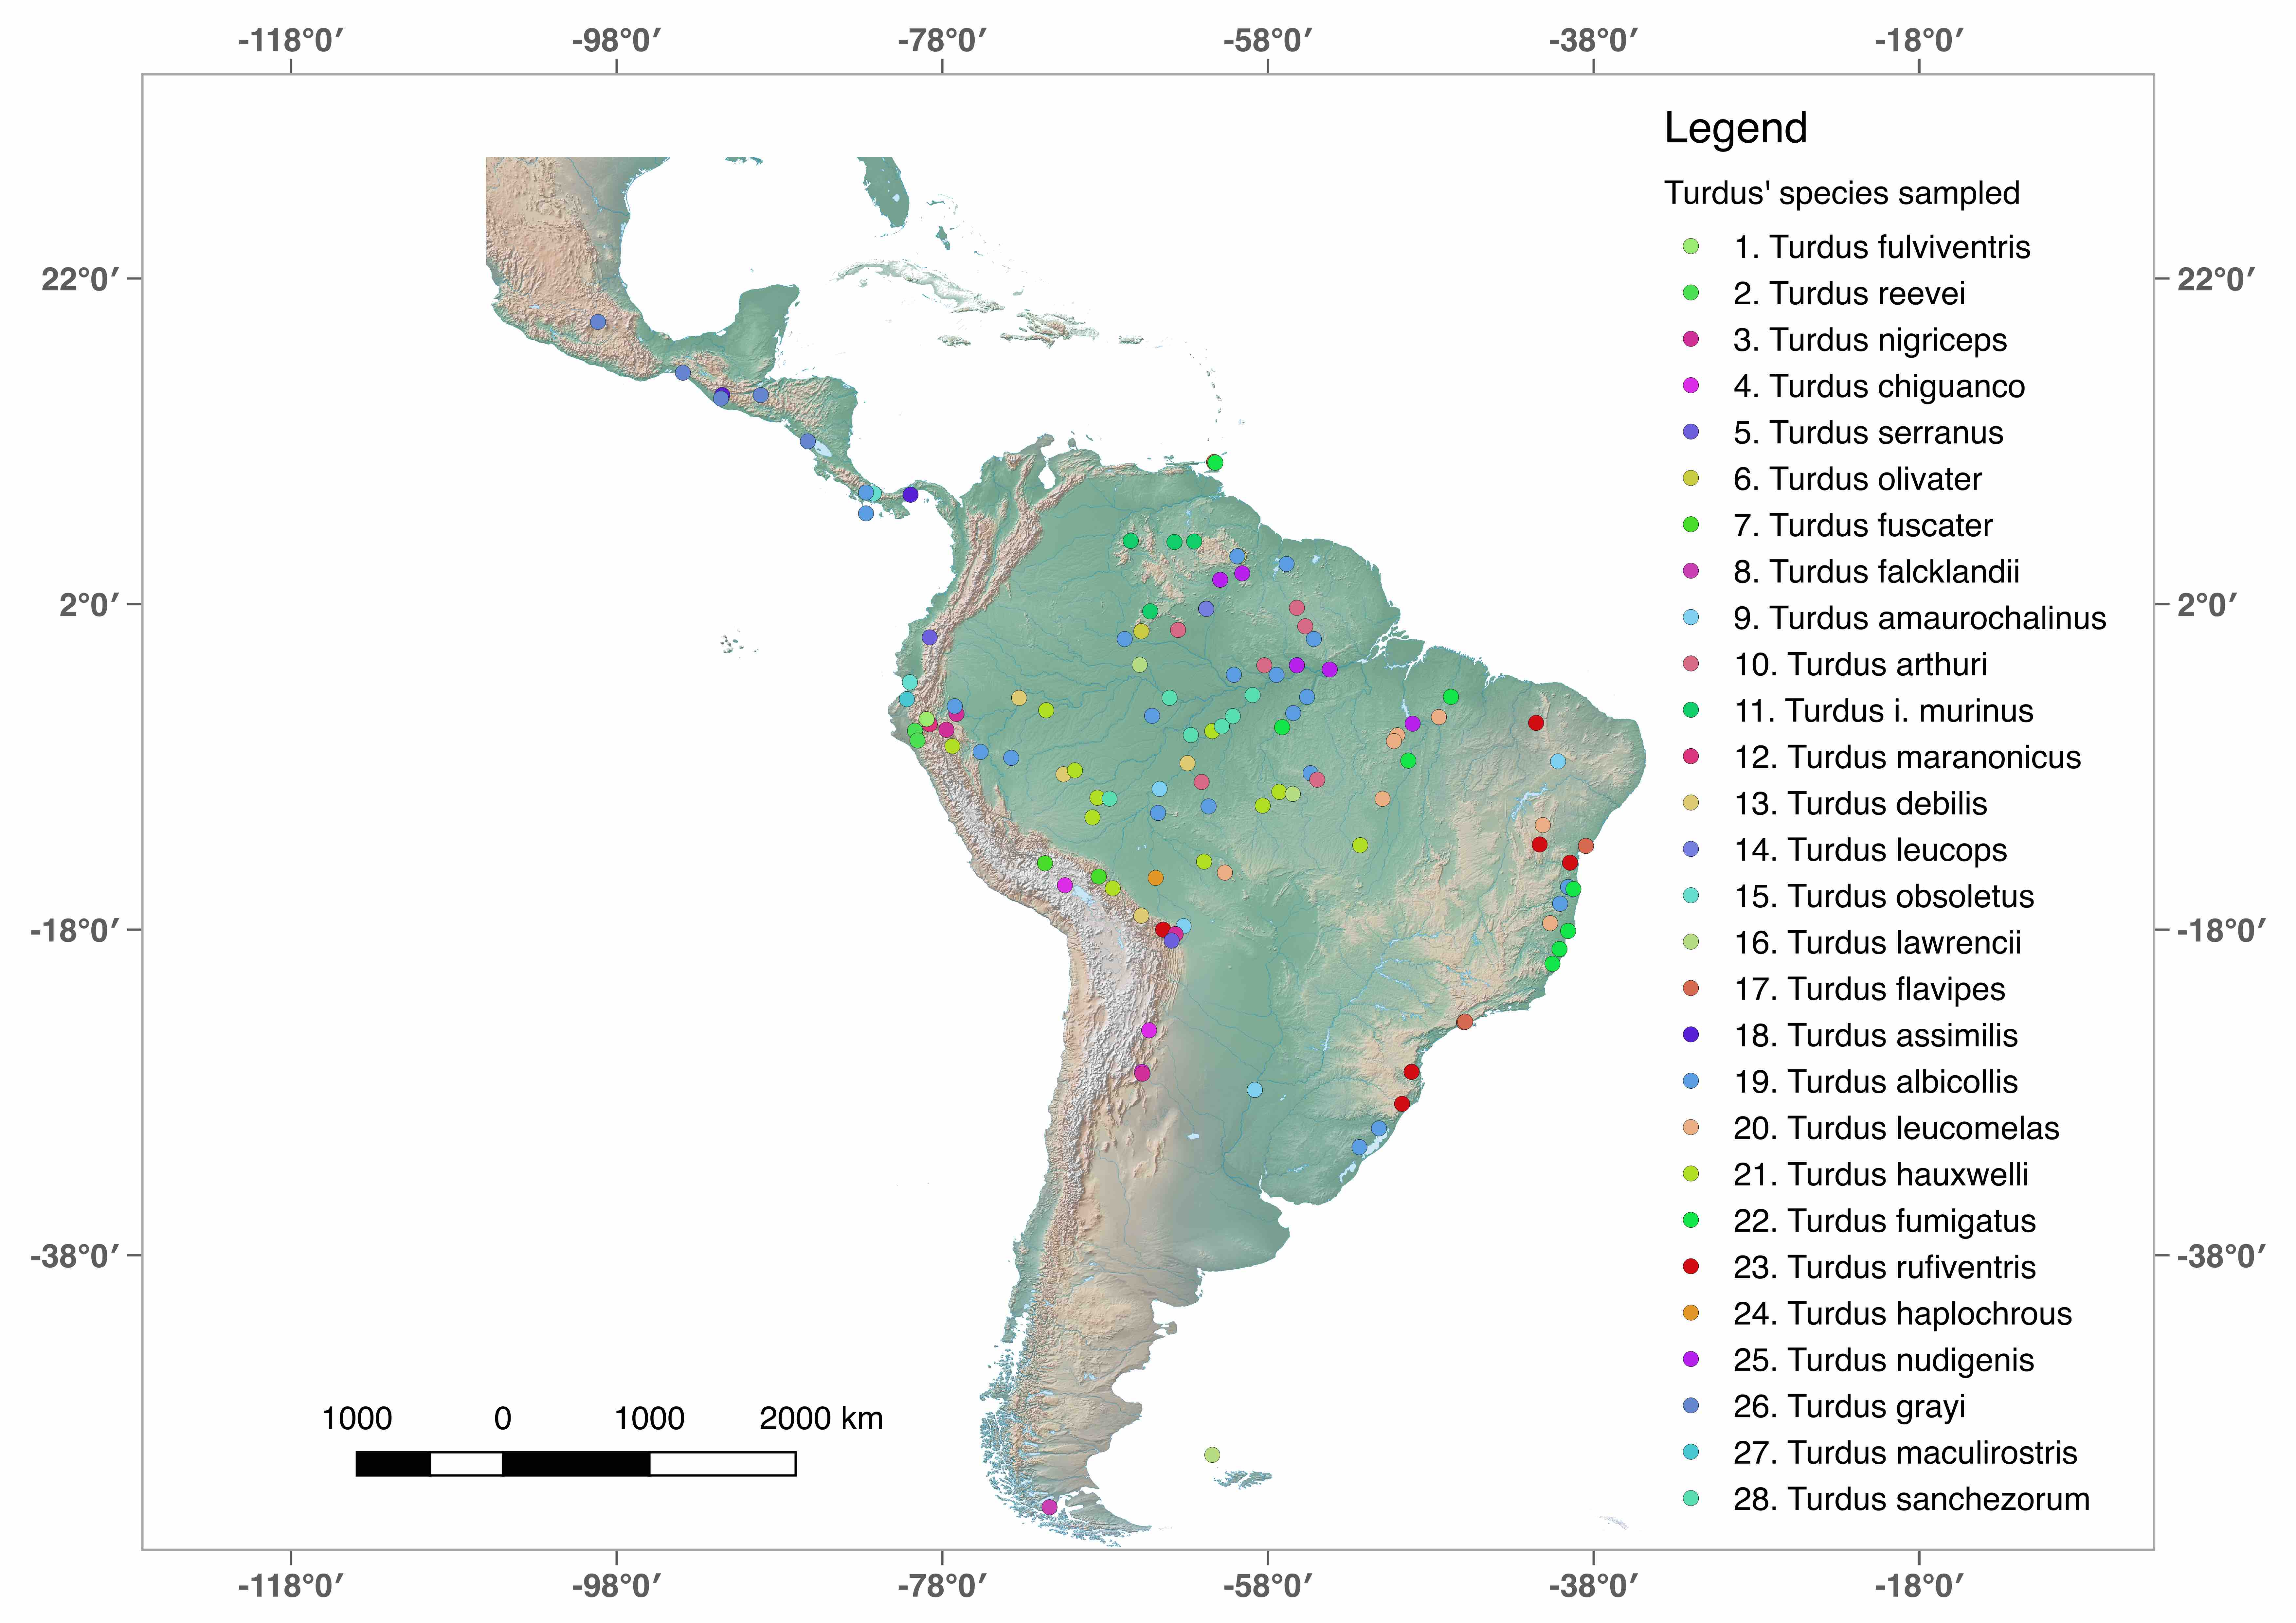

In [2]:
from IPython.display import Image
Image(filename='Map.jpeg')


---

## Workflow:
---

   - I have done, the first steps of the **pipeline for processing UCEs** (1. & 2.), using Phyluce, eitheir at the [Supercomputer SDumont](https://sdumont.lncc.br/) or at [UPPMAX](https://www.uppmax.uu.se/support/user-guides/compute-time-policy/). Some steps (2.4-3.) I have done using my local machine (a MacBook Pro OS X El Capitain Version 10.11.6, Processor 2.5 GHz Intel Core i5, Memory 16GB 1600Mhz DDR3, Startup Disk Macintosh SSD, Phyluce v1.6.6 installed):

---

### 1. [Adatpter quality trimming](https://phyluce.readthedocs.io/en/latest/)
    
 
---

### 2. Assembly [Itero](https://itero.readthedocs.io/en/latest/)
---
* In order to create a reference sequence assembled into contigs using [Itero 1.1](https://itero.readthedocs.io/en/latest/), I proceed as described bellow:


---

#### 2.1 I choose 4 samples to run Itero:
    * TFU14
    * TAL32
    * TFU8
    * THX5

---
**<font color='gray'>Notes:</font> ** 

* I had hard times trying to run Itero. After many trials and diging into some [issues reported on github](https://github.com/search?q=error+itero&type=issues) I finaly realized it was all about how big my files where. I recommend read carefully the [Itero documentation](https://itero.readthedocs.io/en/latest/running.html), and I also recommend to read faircloth-lab website: Lab protocols - Docs - Assembly - [Assembly with itero](http://protocols.faircloth-lab.org/en/latest/protocols-computer/assembly/assembly-with-itero.html)

* My first trials on Sdumont Super Computer I was getting this error: 
>  slurmstepd: error: Exceeded job memory limit

* Again, sometimes Itero stops while processing a sample, and starts generating a huge ammount of temporary files, be careful on how much is the max memmory you have available.

* After selecting samples 
---

#### 2.1 Preparing itero.conf

In [ ]:
[reference]
/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/Assembly_Itero_Jan21/LSU-custom-exon-probes.fasta

[individuals]
TFU14:/Users/Romina/Dropbox (ecoevounifesp)/GitHub/2nd_Chapter_2021/2nd_capter/uce_clean_southAmerica/TFU14
TAL32:/Users/Romina/Dropbox (ecoevounifesp)/GitHub/2nd_Chapter_2021/2nd_capter/uce_clean_southAmerica/TAL32
TFU8:/Users/Romina/Dropbox (ecoevounifesp)/GitHub/2nd_Chapter_2021/2nd_capter/uce_clean_southAmerica/TFU8
THX5:/Users/Romina/Dropbox (ecoevounifesp)/GitHub/2nd_Chapter_2021/2nd_capter/uce_clean_southAmerica/THX5

- I usually prepare the code above using [Nano Text Editor](https://www.youtube.com/watch?v=Jf0ZJZJ8jlI) but if you prefer use a graphic interface I can recommend [sublime](https://www.sublimetext.com/3). 

- Whith the **itero.conf** you are ready to run Itero. The command line I have been using is: 

#### 2.2 Running itero.conf

In [ ]:
itero assemble local --config itero.conf --output assembles_itero --local-cores 5 --subfolder split-adapter-quality-trimmed --allow-multiple-contigs --iterations 5

- This command above will produce 6 folders, representing iteractions 0-4 (5 folders) and a last folder called iter-final/.
- I got the file called **iter-4.all-fasta.fasta** produced for each of the four individuals I selected, and I added the name of the sample to the head of each uce (eg. name | uceXXX). For that I used the following regex:

In [ ]:
find: >(uce-\d+)_\d.+
replace: >\1_NAME_OF_SAMPLE | \1

- At the end you will have a .fasta file like this:

In [ ]:
>uce-1003_TFU14 | uce-1003
AAATACAG........
>uce-1004_TFU14 | uce-1004
CCGTC......

- Then I made a new directory:

In [ ]:
mkdir concat

- To transfer all **iter-4.all-fasta.fasta** from all individuals to this directory. Bellow is the command I used for a single individual:

In [ ]:
cp TFU14/iter-final/iter-4.all-fasta.fasta concat/TFU14.fasta

- In this way, the files are renamed already. Because after that, the next step will be to concatanate all individuals, by running: 

In [ ]:
cat *.fasta > concat_turdus.fasta

#### 2.3 Aligning

- After that, you should align this fasta file. For that I ran: 

In [ ]:
phyluce_align_seqcap_align --fasta concat_turdus.fasta --output mafft-nexus-edge-trimmed --taxa 6 --aligner mafft --cores 5 --incomplete-matrix --ambiguous

#### 2.4 Exploiting the UCE Alignments

- Inside the output folder mafft-nexus-edge-trimmed you will find all nexus for every UCE loci you have sequenced. Before go to the next step it is worth open all nexus in a program to edit alignments. I have used Geneious® 7.1.9. The aim here is adjust expurious aligments by trimming regions, or even mapping those contigs again using your LSU-custom-exon-probes.fasta. **<font color='red'>DO NOT WORRY</font>** about the numbers of loci. If you are using Geneious, you can easily select the option **<font color='blue'>% Pairwise Identity</font>** or **<font color='blue'>% Identical sites</font>**, so Geneious will display for you in a organized way the worst alignments first. 
- Bellow you can see how is a "bad alignment":

#### 2.5 Examples of bad alignment:

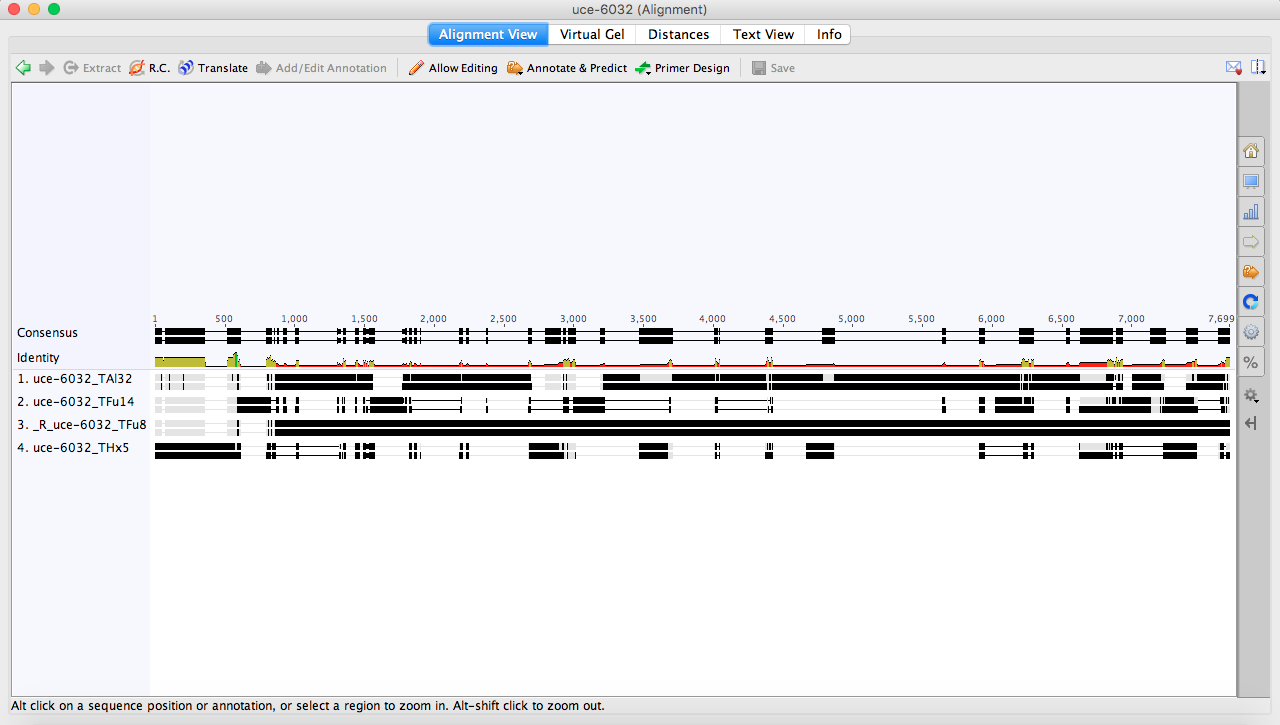

In [1]:
from IPython.display import Image
Image(filename='bad_alignment.png')

- In the example above I used Geneious to map once again these contigs on top of the reference sequence for this loci, to manage to get a better alignment. 
- Bellow I will add another type of "bad alignment":

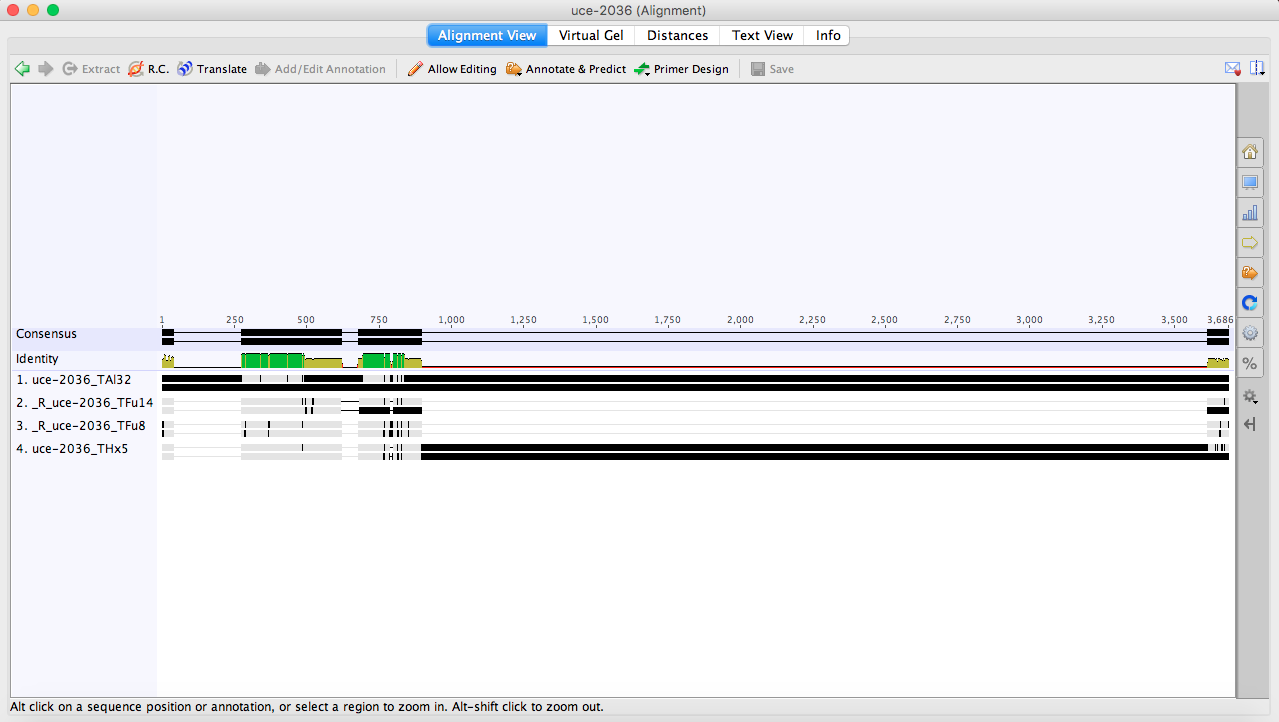

In [2]:
from IPython.display import Image
Image(filename='bad_alignment2.png')

#### 2.6 Example of good alignment

- The following alignment is an example of how is a "good alignment":

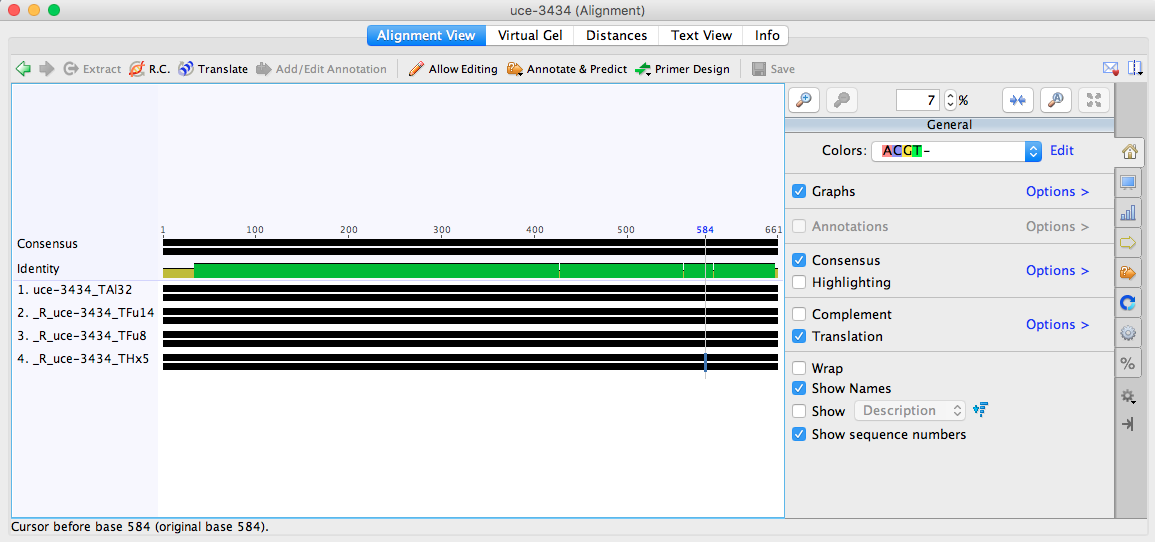

In [3]:
from IPython.display import Image
Image(filename='good_alignment.png')

- After checking and solving all problems with alignment, you can generate the consensus file for all loci, and then you can extract this file from Geneious as .fasta file. **This fasta file is going to be your reference file for all individuals**. 


#### 2.7 PHASING
- You can now prepare the phasing.conf file to run the next phyluce script. 
- Bellow there is an example with the 4 samples I had:

In [ ]:
PATH:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/4. phasing_UCE_Dataset_TurdusSouthAmerica/phasing_turdus.conf

**HINT**: How to find the flowcell on your fastq files? 
[link](https://support.illumina.com/help/BaseSpace_OLH_009008/Content/Source/Informatics/BS/FileFormat_FASTQ-files_swBS.htm)

##### 2.7.1 **phasing_turdus.conf**:

In [ ]:
[references]
INPA_A_23653_Tur_san:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/3. assembly_itero_Turdus_SouthAmerica/concat_itero/concat_turdusSA_ref.fasta 
INPA_A_23688_Tur_san:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/3. assembly_itero_Turdus_SouthAmerica/concat_itero/concat_turdusSA_ref.fasta
PRS472:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/3. assembly_itero_Turdus_SouthAmerica/concat_itero/concat_turdusSA_ref.fasta
TAL10:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/3. assembly_itero_Turdus_SouthAmerica/concat_itero/concat_turdusSA_ref.fasta

[individuals]
INPA_A_23653_Tur_san:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/2. uce_clean_Turdus_SouthAmerica/INPA_A_23653_Tur_san/
INPA_A_23688_Tur_san:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/2. uce_clean_Turdus_SouthAmerica/INPA_A_23688_Tur_san/
PRS472:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/2. uce_clean_Turdus_SouthAmerica/PRS472/
TAL10:/Users/Romina/Dropbox (ecoevounifesp)/Postdoc_INPA_2020/1. Turdus_South_America/Data_and_Analyses/2. uce_clean_Turdus_SouthAmerica/TAL10/

[flowcell]
INPA_A_23653_Tur_san:/HYJ7YCCXY
INPA_A_23688_Tur_san:/HYJ7YCCXY
PRS472:/C783JANXX
TAL10:/C783JANXX


- The next script will be quite timing cosuming. 

- If you manage to follow the processing and realize it is going quite fast, be careful, because something can be wrong. 

- **HINT**: Check the log files produced in each folder, I was having this [issue](https://github.com/faircloth-lab/phyluce/issues/205). 

- I only manage to solve it, installing a diferent phyluce (newer version, 1.6.7), and running:

In [ ]:
conda install --force-reinstall samtools

- If everything is running fine you will be able to run the following command line:

In [ ]:
phyluce_snp_bwa_multiple_align --config phasing_turdus.conf --output multialign-bams --cores 4 --log-path log --mem --subfolder split-adapter-quality-trimmed

- The next script will be quite timing cosuming. 

- If you manage to follow the processing and realize it is going quite fast, be careful, because something can be wrong. 

- **HINT**: Check the log files produced in each folder, I was having this [issue](https://github.com/faircloth-lab/phyluce/issues/205). 

- I only manage to solve it, installing a diferent phyluce (newer version, 1.6.7), and running:

In [ ]:
phyluce_snp_phase_uces --config phasing_turdus.conf --bams multialign-bams --output multialign-bams-phased-reads/ --cores 4

##### 2.7.2 **Aligning phased UCEs with MAFFT**:

In [ ]:
phyluce_align_seqcap_align --fasta multialign-bams-phased-reads/fastas/joined_allele_sequences_all_samples.fasta --output phased-data-mafft-nexus-edge-trimmed --taxa 284 --aligner mafft --cores 4 --incomplete-matrix --log-path log --ambiguous


---
**<font color='red'>WARNING:</font>**

---

- If you use only **one** reference for all individuals, as is the case of this project (see 2.7.1 phasing_turdus.conf, above), all your files were created with the same name (Ex: uce312-concat_turdusSA_ref | uce312
- Therefore, a replacement of the headers of all 0.clean.balanced and 1.clean.balanced files for each individual contained in the phased-read/fastas folder is nedeed, so that the headers revert to the name of the original samples. 
- After changing the names concatenate all 0.clean.balanced and 1.compleclean.balanced with the command

> cat *.0.clean.balanced.fasta > concat.0.clean.balanced.fasta
> cat *.1.clean.balanced.fasta > concat.1.clean.balanced.fasta

- then concatenate the two concats

> cat concat.* > concat.all.fasta

- This concat.all.fasta will be the replacement for "joined_allelesequences_all_samples" in command line bellow which will remain as:


In [ ]:
phyluce_align_seqcap_align --fasta multialign-bams-phased-reads/fastas/concat.all.fasta --output phased-data-mafft-nexus-edge-trimmed --taxa 284 --aligner mafft --cores 4 --incomplete-matrix --log-path log --ambiguous

- From now you can apply different command lines to a. compute basic statistics; b. Clear names; c. prepare your data for [downstream analyses](https://phyluce.readthedocs.io/en/latest/tutorials/tutorial-1.html#preparing-data-for-downstream-analysis). 
- In this documentation I will go to the next step that our project is also interested that is **Extract SNPS from our phased Alignment**. 

---
### 3. Extracting SNPs 
---


- I used a script written by [Tobias Andermann](https://github.com/tobiashofmann88/UCE-data-management/blob/master/snps_from_uce_alignments.py)

#### 3.1 Converting alignments:  nexus to fasta format

---
It is necessary converting the nexus files into fasta file. You can use Phyluce to do this: 

---

In [ ]:
phyluce_align_convert_one_align_to_another --alignments phased-data-mafft-nexus-edge-trimmed-80p/ --output phased-data-mafft-nexus-edge-trimmed-80p-fasta/ --input-format nexus --output-format fasta --cores 4

#### 3.2 Preparing config file

ex: Bellow you can see how should be the config file. It is the name of the sample followed by _0 or _1, corresponding to the two alleles of each individual:


In [ ]:
gfb2164_0
gfb2871_0
INPA_A_23653_Tur_san_0
INPA_A_23688_Tur_san_0
PRS472_0
rop186_0
TAL2_0
TAL3_0
gfb2164_1
gfb2871_1
INPA_A_23653_Tur_san_1
INPA_A_23688_Tur_san_1
PRS472_1
rop186_1
TAL2_1
TAL3_1

#### 3.3 Replacing ?  for N

To do so, enter the folder with the UCE folders and create a new folder that will contain the new folders without ?. Here I will call it fasta_to_snps. Then go to terminal and type:


In [ ]:
for i in *.fasta; do perl -npe 's/[?]/N/g' $i > ./path_to_the_folder/$i; done 

#### 3.4 Executing the script

In [ ]:
/Users/Romina/anaconda/envs/phyluce/lib/python2.7/site-packages/phyluce/snps_from_uce_alignments.py --input ../turdus-phased-data-mafft-nexus-edge-trimmed-cleaned-names-80p-fasta/fasta_snps --config ../snps.conf --phased --snps one --delimiter _ --output ../turdus_snps_to_SNMF

#### You are ready to use the files generated in your downstream analyses (eg. phylogenetics, population structure, etc)!!!